<a href="https://colab.research.google.com/github/sid781/Iris-Dataset---Logistic-Regression/blob/master/Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [29]:
data = pd.read_csv("Iris.csv")

In [30]:
df = data.copy()

In [31]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


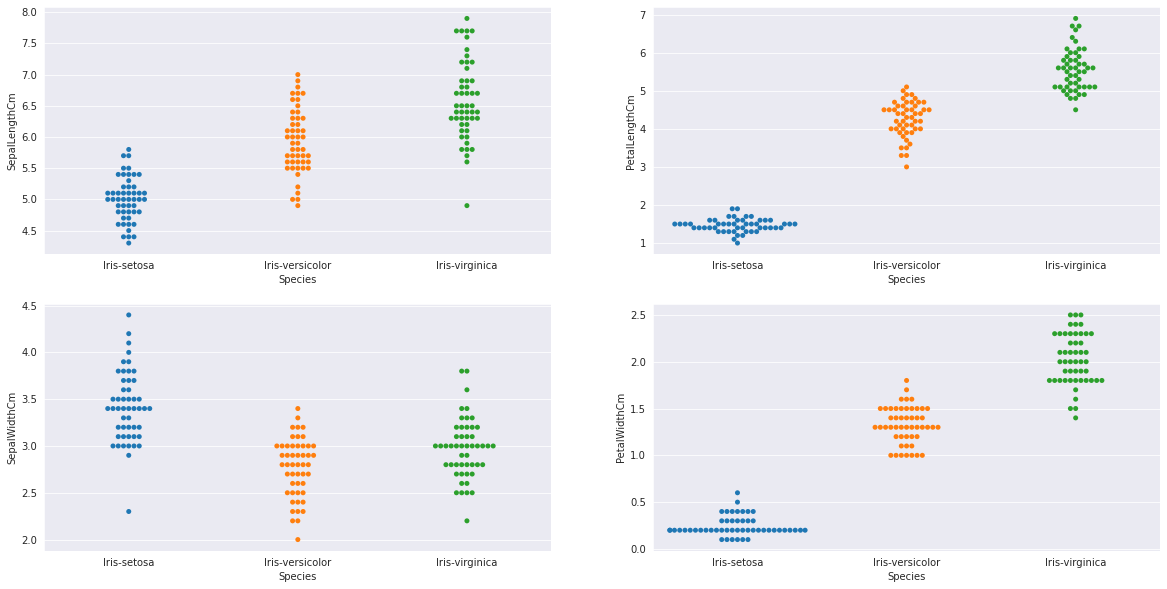

In [34]:
sns.set_style("darkgrid")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2 ,figsize=(20,10))
sns.swarmplot(y=df['SepalLengthCm'], x=df['Species'], ax=ax1)
sns.swarmplot(y=df['PetalLengthCm'], x=df['Species'], ax=ax2)
sns.swarmplot(y=df['SepalWidthCm'], x=df['Species'], ax=ax3)
sns.swarmplot(y=df['PetalWidthCm'], x=df['Species'], ax=ax4)


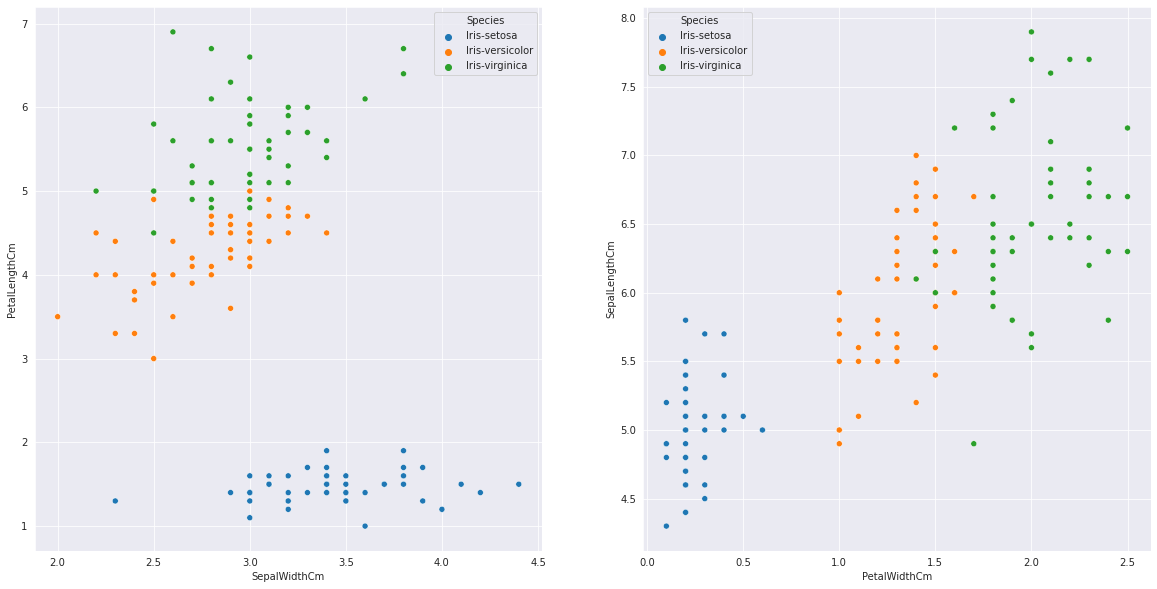

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(20,10))
sns.scatterplot(y=df['PetalLengthCm'], x=df['SepalWidthCm'], hue=df['Species'], ax=ax1)
sns.scatterplot(y=df['SepalLengthCm'], x=df['PetalWidthCm'], hue=df['Species'], ax=ax2)

## Label Encoding

In [36]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encode = LabelEncoder()
y = encode.fit_transform(y)

## Spliting into training and test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape

(120, 4)

In [40]:
X_test.shape

(30, 4)

## Feature Scaling

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction

In [43]:
y_pred = classifier.predict(X_test)

## Scoring the performance

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [45]:
accuracy_score(y_test, y_pred)

1.0